# Desafío III: Construyendo un Clasificador

# 1. Introducción

### 1.1. Acerca del Dataset a utilizar

Para el presente desafío intentaremos construir un clasificador.
Para ello, debemos encontrar primero una problemática que queramos analizar y modelar. Nos pareció interesante focalizar la búsqueda en alguna base de datos que nos permita investigar y desarrollar algún problema típico al que podamos enfrentarnos el día de mañana si nos encontramos desempeñando el rol de Data Scientists en una compañía.

Teniendo en cuenta esto, elegimos un dataset que evalúa el grado de satisfacción de los pasajeros de una aerolínea estadounidense.
Pueden encontrar dicho dataset así como también la descripción de sus campos en la siguiente ruta: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

Como veremos enseguida, se trata de una base de 103.904 datos que estudia al consumidor en múltiples aspectos. Creemos que es un relevamiento más que interesante para: 
- Primero: intentar etiquetar mediante un clasificador a un pasajero por fuera de la muestra. Para ello, utilizaremos los modelos KNN, Regresión Logística y Naive Bayes vistos en clase, así como también otras técnicas estudiadas para la optimización de Hiperparámetros.
- Segundo: luego de la aplicación de estos métodos, y teniendo en cuenta el análisis descriptivo previo de las variables, iremos "jugando" con las features y estudiaremos cuál/es de ella/s tienen un impacto mayor en el grado de satisfacción del consumidor promedio. 

Así, nuestra intención no consiste únicamente limitarnos a especificar un modelo de clasificación, sino que además intentaremos ver por dónde está el core del problema para de esta forma poder elevarle a la empresa donde estemos trabajando una propuesta de dónde la compañía tiene que hacer foco para resolver los principales puntos de dolor que tienen los consumidores y que hacen que califiquen su experiencia con la aerolínea como "neutral/insatisfactoria". Es por ello que nuestra variable target será la "marca" de instatisfacción (haremos dummy la variable "satisfaction" y nos quedaremos con la columna que se "activa", es decir, que toma valor 1, cuando el pasajero califica su experiencia como neutral/insatisfactoria").

Creemos que esta propuesta de valor nos permitirá añadir un diferencial a la hora de la toma de decisiones basadas en datos.


### 1.2. Breve descripción de las variables del dataset

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### 1.3. Comencemos con lo básico...

Importamos librerías para el analisis exploratorio

In [1]:
import pandas as pd
import numpy as np
import funpymodeling as fp
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

Importamos dataset a utilizar (Kaggle trae ya dividido el dataset en 2: train con 109 mil observaciones -que es el que utilizaremos-, y test, que lo levantamos a continuación pero no lo usaremos, ya que los 109 mil datos creemos que son robustos para estudiarlos por sí mismos):

In [2]:
dftrain= pd.read_csv('train.csv', delimiter=";")

Removemos el campo "índice":

In [3]:
dftrain = dftrain.drop(["Unnamed: 0"], axis=1)

Convertimos en dummies las principales variables categóricas para poder incluirlas en el modelo:

In [4]:
dftrain = dftrain.join(pd.get_dummies(dftrain.satisfaction, prefix="satis"))

In [5]:
dftrain = dftrain.join(pd.get_dummies(dftrain.Gender, prefix="gender", drop_first=True))

In [6]:
dftrain = dftrain.join(pd.get_dummies(dftrain["Customer Type"], prefix="cliente",drop_first=True))

In [7]:
dftrain = dftrain.join(pd.get_dummies(dftrain["Type of Travel"], prefix="viaje", drop_first=True))

In [8]:
dftrain = dftrain.join(pd.get_dummies(dftrain.Class, prefix="boleto", drop_first=True))

Observemos cómo queda el dataset provisorio con estas incorporaciones...

In [9]:
dftrain.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satis_neutral or dissatisfied,satis_satisfied,gender_Male,cliente_disloyal Customer,viaje_Personal Travel,boleto_Eco,boleto_Eco Plus
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,25,18,neutral or dissatisfied,1,0,1,0,1,0,1
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,6,neutral or dissatisfied,1,0,1,1,0,0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,0,0,satisfied,0,1,0,0,0,0,0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,11,9,neutral or dissatisfied,1,0,0,0,0,0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,0,0,satisfied,0,1,1,0,0,0,0


Asimismo, constetamos el tipo de datos que tenemos y si hay alguna variable que tenga información nula...

In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 103904 non-null  int64 
 1   Gender                             103904 non-null  object
 2   Customer Type                      103904 non-null  object
 3   Age                                103904 non-null  int64 
 4   Type of Travel                     103904 non-null  object
 5   Class                              103904 non-null  object
 6   Flight Distance                    103904 non-null  int64 
 7   Inflight wifi service              103904 non-null  int64 
 8   Departure/Arrival time convenient  103904 non-null  int64 
 9   Ease of Online booking             103904 non-null  int64 
 10  Gate location                      103904 non-null  int64 
 11  Food and drink                     103904 non-null  

# 2. Análisis Exploratorio: 
### 2.1. Estudiando las características de los pasajeros insatisfechos

Como mencionamos al inicio, además de estimar los modelos de clasificación, buscaremos dar respuesta a la gente encargada de la toma de decisiones en la aerolínea acerca de los principales puntos que debería intentar corregir o mejorar de cara a la experiencia al usuario.

Para esto, analizaremos las principales features con las que contamos y su relación con la variable target.

In [11]:
data = dftrain

In [12]:
fp.status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.0,0,0.000000,103904,int64
1,Gender,0,0.0,0,0.000000,2,object
2,Customer Type,0,0.0,0,0.000000,2,object
3,Age,0,0.0,0,0.000000,75,int64
4,Type of Travel,0,0.0,0,0.000000,2,object
5,Class,0,0.0,0,0.000000,3,object
6,Flight Distance,0,0.0,0,0.000000,3802,int64
7,Inflight wifi service,0,0.0,3103,0.029864,6,int64
8,Departure/Arrival time convenient,0,0.0,5300,0.051009,6,int64
9,Ease of Online booking,0,0.0,4487,0.043184,6,int64


Para poder entender mejor, vamos a graficar las variables cuantitativas para ver su respectivo comportamiento. 

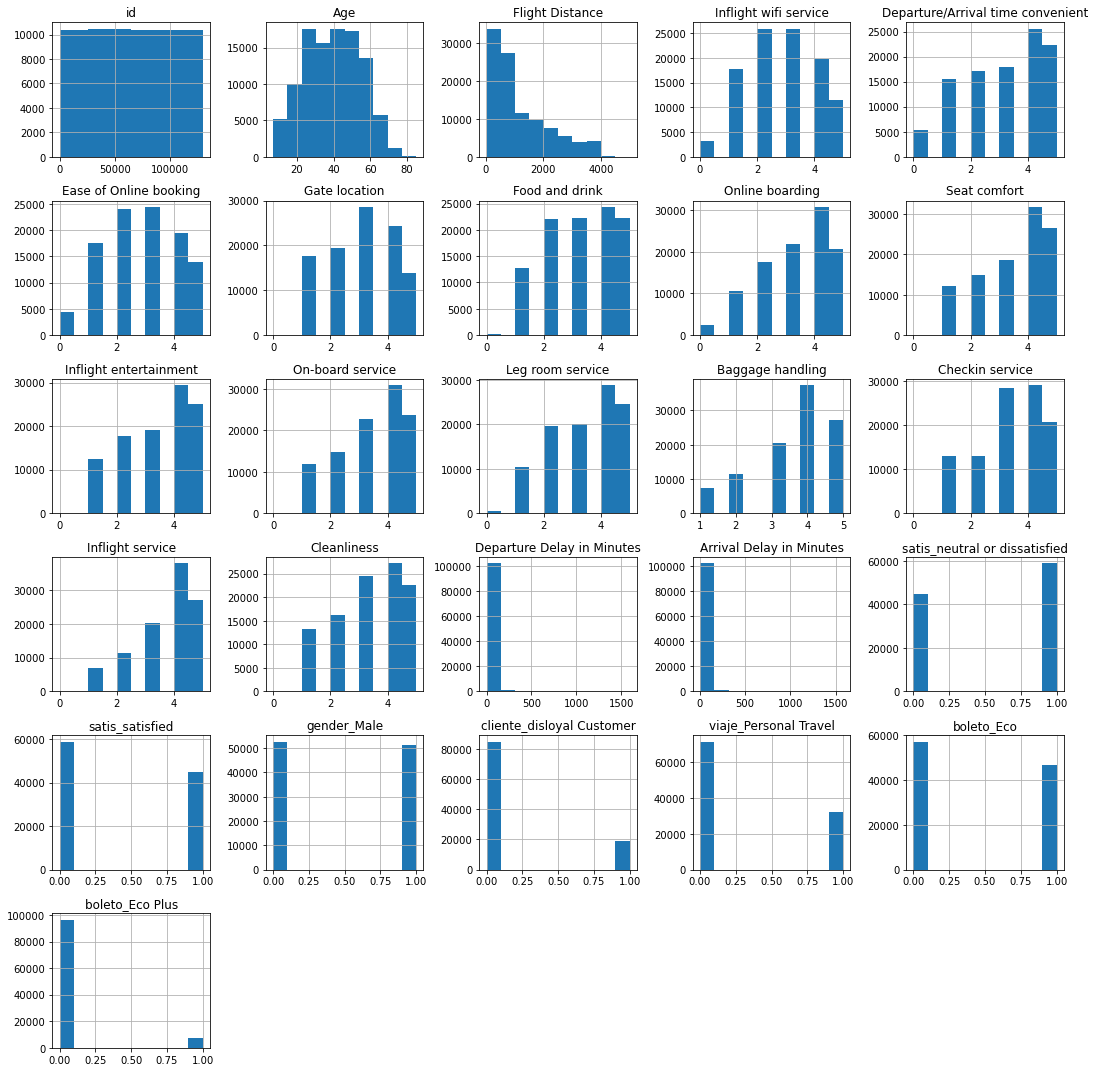

In [13]:
data.hist(figsize=(15,15)) 
plt.tight_layout()
plt.show()

#### Vamos a separar aquellas variables cuantitativas de las cualitativas, para optmizar a posterior el análisis.

In [14]:
cat_col= [col for col in data.columns if data[col].dtype == "object"]
num_col= [col for col in data.columns if data[col].dtype != "object"]

### 2.1.1. Análisis de variables cuantitativas

In [15]:
num_sin_id=fp.num_vars(data,["id"])

In [ ]:
fp.profiling_num(data[num_sin_id])

In [ ]:
data[num_sin_id].corr()

### 2.1.2. Análisis de variables categóricas

Para poder identificar la representatividad y ocurrencia de las distintas categorías de las mismas y ver cómo se distribuyen:

In [18]:
fp.freq_tbl(data)

NameError: name 'fp' is not defined

### 2.1.3. Análisis de la variable target

Observemos también cómo están distribuidas las etiquetas del campo satisfacción...
Vemos que las observaciones están bastante equitativas. 

No existe una categoría que domine necesariamente la muestra, por lo cual de aquí en adelante no creemos necesario utilizar la opción "stratify" a la hora de modelar, preferimos trabajar con los datos puros de la muestra.

In [19]:
data.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

También podemos ver cómo se distribuyen dentro del dataset otras variables que pueden ser relevantes a la hora de definir la satisfacción agregada del cliente para con la aerolínea.

Consideremos esta parte como un breve análisis exploratorio preliminar para ver si podemos hacer alguna detección temprana de algo que nos llame la atención...

In [20]:
data.Class.value_counts(normalize=True)

Business    0.477989
Eco         0.449886
Eco Plus    0.072124
Name: Class, dtype: float64

Veamos la variable target previo a hacerla dummy en función del tipo de clase del boleto de avión:

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

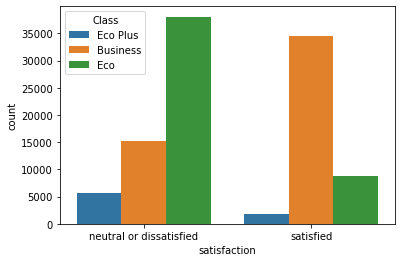

In [21]:
sns.countplot(x="satisfaction",hue= "Class",data=data)

In [22]:
#sns.countplot(x="satisfaction",hue= "GENERO",data=data)
#sns.countplot(x="satisfaction",hue= "RANGO EDAD",data=data)

Podría ser interesante categorizar la distancia de los vuelos en "Corta", "Media" y "Larga"... a continuación lo hacemos y más adelante quizás lo utilicemos.

In [23]:
dftrain["Flight Distance"].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [24]:
duracion = dftrain["Flight Distance"].apply(lambda x:  "C" if x <= 500 else("M" if x <= 1400 else "L"))

In [25]:
duracion = duracion.rename("duracion")

In [26]:
dftrain=pd.concat([dftrain,duracion], axis=1)

Vamos a ver ahora las correlaciones iniciales que tenemos únicamente para la variable target: 

La Dummy de Satisfaction que se "activa" (es decir, toma valor 1) cuando el pasajero califica su experiencia como "neutral/insatisfactoria".

Esta será de aquí en más la variable a explicar o a clasificar.

<AxesSubplot:>

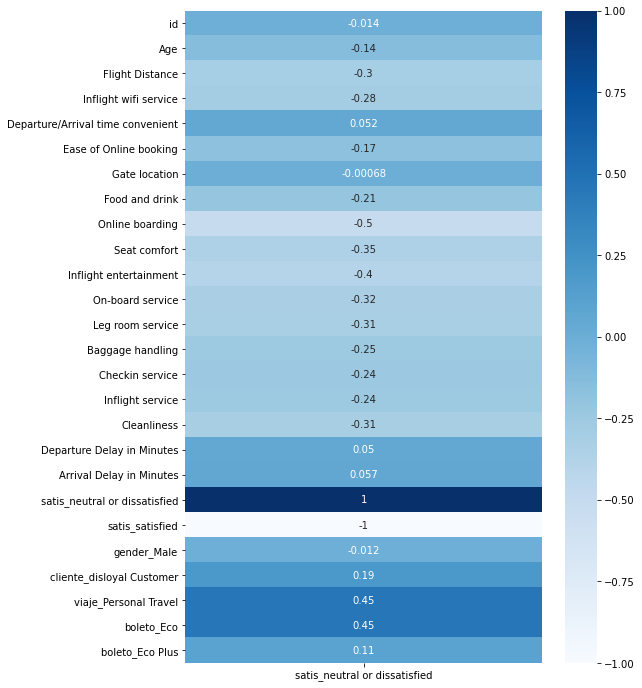

In [27]:
plt.figure(figsize=(8,12))
sns.heatmap(dftrain.corr()[["satis_neutral or dissatisfied"]], annot=True, cmap="Blues")

### 2.1.4. Procesamiento y análisis de otras variables

Trabajemos con la variable "age". La idea será discretizarla para poder segmentar y lograr identificar aquel nicho con mayor grado de satisfacción.

In [28]:
data.Age.describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [29]:
data["RANGO EDAD"]= data.Age.apply(lambda x: "1-18" if x <= 18 
                                   else ("18-30" if x <= 30 
                                   else("30-50" if x <= 50 
                                    else("50-70" if x <= 70
                                    else "70 o más"))))

Trabejamos ahora con la variable "Flight Distance" para aprovechar la información de la misma.

In [30]:
fp.profiling_num(data["Flight Distance"])

NameError: name 'fp' is not defined

In [31]:
data["Flight Distance"].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

Veamos cómo se distribuyen la distancia, las distintas clases y el tipo de viaje con una pivot table...



In [32]:
pivot_distancia_y_clase=data.pivot_table(values=["Flight Distance"], columns=["Type of Travel"],index=["Class"], aggfunc=["mean"], margins=True)
pivot_distancia_y_clase

mean                             
               Flight Distance                             
Type of Travel Business travel Personal Travel          All
Class                                                      
Business           1714.857392      819.633287  1675.976925
Eco                 682.800267      789.814482   743.439748
Eco Plus            705.319280      792.249445   747.125567
All                1368.287237      792.081057  1189.448375

<Figure size 720x720 with 0 Axes>

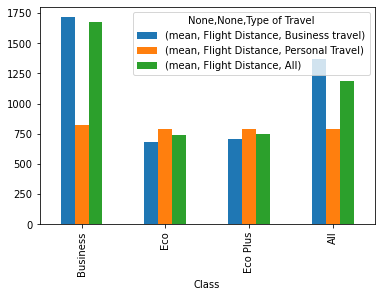

In [33]:
plt.figure(figsize=(10,10))
pivot_distancia_y_clase.plot(kind="bar");

Ahora trabajamos sobre aquellas variables asociadas con el tiempo.
Vamos a transformarlas en dummie para poder categorizar aquellos vuelos que llegan tarde con los que no.

In [34]:
fp.profiling_num(data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']])

NameError: name 'fp' is not defined

In [35]:
data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].max()

Departure Delay in Minutes    1592
Arrival Delay in Minutes      1584
dtype: int64

Vamos a discretizar las variables asociadas con el tiempo. Podriamos ver si influye más la demora en la llegada o en la salida.

In [36]:
data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000
mean,14.815618,15.133392
std,38.230901,38.649776
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


Observemos gráficamente su distribución para entender su comportamiento:

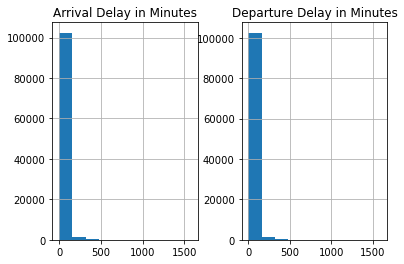

In [37]:
data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].hist();

Clasificamos y categorizamos las variables vinculadas al tiempo para poder entender mejor la insatisfacción de los clientes.

Calculamos la demora total teniendo en cuenta tanto la demora en la salida del avion como en la llegada.

In [38]:
data["Tiempo Demora Total"]=data.apply(lambda x: "Sin demora" if (x["Departure Delay in Minutes"] and x["Arrival Delay in Minutes"] == 0) 
           else("30min o menos" if (x["Departure Delay in Minutes"] and x["Arrival Delay in Minutes"] <=30) 
            else "30min - 1hs" if (x["Departure Delay in Minutes"] and x["Arrival Delay in Minutes"] <= 60)
            else "1 hs o más"), axis=1)

In [39]:
data["Tiempo Demora Total"].value_counts()

1 hs o más       65940
30min o menos    20198
Sin demora       10894
30min - 1hs       6872
Name: Tiempo Demora Total, dtype: int64

Segmentamos la demora de la "salida" de los aviones:

In [40]:
data["Tiempo Demora Salida"]=data.apply(lambda x: "Sin demora" if (x["Departure Delay in Minutes"] == 0) 
           else("30min o menos" if (x["Departure Delay in Minutes"] <=30) 
            else "30min - 1hs" if (x["Departure Delay in Minutes"] <= 60)
            else "1 hs o más"), axis=1)

In [41]:
data["Tiempo Demora Salida"].value_counts()

Sin demora       58668
30min o menos    30707
30min - 1hs       7290
1 hs o más        7239
Name: Tiempo Demora Salida, dtype: int64

Ahora lo segmentamos en función de la demora en la "llegada" de los aviones:

In [42]:
data["Tiempo Demora LLegada"]=data.apply(lambda x: "Sin demora" if (x["Arrival Delay in Minutes"] == 0) 
           else("30min o menos" if (x["Arrival Delay in Minutes"] <=30) 
            else "30min - 1hs" if (x["Arrival Delay in Minutes"] <= 60)
            else "1 hs o más"), axis=1)

In [43]:
data["Tiempo Demora LLegada"].value_counts()

Sin demora       58469
30min o menos    30773
30min - 1hs       7335
1 hs o más        7327
Name: Tiempo Demora LLegada, dtype: int64

Hacemos dummy las variables discretizadas para ver como impacta la frecuencia de cada una en nuestra target:

In [44]:
# Las variables no se encuentran en este dataset. homogeneizar los datasets para que pueda correr todo.
data= data.join(pd.get_dummies(data["RANGO EDAD"], prefix= "Edad"))
data= data.join(pd.get_dummies(data["Tiempo Demora Total"], prefix="Demora"))
#data= data.join(pd.get_dummies(data["Distancia"], prefix="Distancia"))

In [45]:
#data = data.join(pd.get_dummies(data.satisfaction, prefix="satis"))

In [46]:
#data.columns

In [47]:
#plt.figure(figsize=(12,12))
#sns.heatmap(data.drop(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel','Class', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1).corr()[["satis_neutral or dissatisfied"]], annot=True, cmap="Greens");

In [48]:
fp.freq_tbl(data.drop(['Tiempo Demora Salida', 'Tiempo Demora LLegada'], axis=1)[data.satisfaction == "neutral or dissatisfied"])

NameError: name 'fp' is not defined

### 2.2. Conclusiones del análisis exploratorio:

#### Características del pasajero insatisfecho

Las personas más insatisfechas son:
* Personas leales a la empresa. Publico cautivo o no (variable loyalty)
* Viajan en la clase Economica (Variable class) sacamos esta
* Tienen entre 30 y 50 años (Variable age)
* Cuyo vuelo demore más de 1h (variable delay arrived y departures) sacamos esta
* El vuelo en cuestión es "Media Distancia" (entre 420km y 1200km) (variable flight distance)
* Online boarding  sacamos esta
* wifi
* Enterteiment
* Type of travel

#### Esto sin dudas nos servirá para poder "jugar" con las features que incluiremos en nuestro modelo. Si bien inicialmente intentaremos utilizar todas las variables que tenemos a nuestro alcance, más adelante intentaremos sacar las que en el párrafo anterior destacamos para ver si realmente nuestro clasificador baja su performance al no incluirlas en el modelo.

# 3. Modelo KNN

### 3.1. Modelo General

Comencemos importando el clasificador KNN de la librería SKLEARN, dentro del módulo "neighbors"...

También ya instanciamos el modelo especificando un valor de k-vecinos en el argumento n_neighbors... inicialmente consideraremos 5 vecinos, para luego ver cómo podemos mejorar nuestra predicción.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

Definimos cuál será nuestro vector de features (X_train) y nuestra variable target (y_train). 

Inicialmente, probaremos armar el clasificador con todas las variables numéricas que tenemos a disposición, a excepción del ID (código único de la respuesta de cada pasajero).

In [18]:
X_train = dftrain.drop(columns=["id","satisfaction", "satis_satisfied", "satis_neutral or dissatisfied", "Gender", "Customer Type", "Type of Travel", "Class", "duracion"])
y_train = dftrain["satis_neutral or dissatisfied"]

In [19]:
X_train.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'gender_Male', 'cliente_disloyal Customer', 'viaje_Personal Travel',
       'boleto_Eco', 'boleto_Eco Plus'],
      dtype='object')

Realizamos la división del dataset en el conjunto de entrenamiento y el de testeo., para luego ajustar a los datos de entrenamiento y predecir las etiquetas para los datos de test.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 0)

In [21]:
knn.fit(X_train, y_train);

In [22]:
y_pred = knn.predict(X_test)

In [23]:
#y_pred = pd.Series(y_pred, name="y_pred")

Ahora armemos una tabla con las predicciones, indicando si fueron acertadas o no...

In [24]:
df_pred = pd.concat([X_test, y_test, pd.Series(y_pred, index=y_test.index), y_test==y_pred], axis=1)
prediccion = df_pred.iloc[:,29:30]

In [25]:
prediccion.reset_index()

,index
0,70655
1,56114
2,95351
3,32181
4,5214
...,...
25971,28117
25972,14513
25973,72577
25974,100403


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#accuracy_score(y_train, y_pred)
accuracy_score(y_test, y_pred)

0.7418771173390822

#### 3.1.1. Optimizando el K

Primero estandaricemos la matriz de features... teniendo en cuenta que tenemos features que se encuentran en distintas unidades de medida, esto es algo que tenemos que hacer sí o sí.

In [28]:
# Utilizamos sklearn para estandarizar la matriz de features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [29]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [-0. -0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0. -0.  0. -0.
  0.  0. -0.  0.  0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Ahora definamos la estrategia de validación cruzada con la matriz estandarizada...

In [30]:
# Calculamos los scores de cross validation sobre los features estandarizados:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores_para_df_standard = []

In [ ]:
for i in range(1, 21):
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

Creamos el DataFrame a partir de la lista de diccionarios, identificando el score máximo y asignando a una variable el valor del k óptimo que se condice con ese score máximo.

In [ ]:
df_scores_standard = pd.DataFrame(scores_para_df_standard)
print(df_scores_standard)
df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max()]
best_k = df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
print ("La cantidad óptima de vecinos a considerar es: ", best_k)

#### 3.1.2. Vamos a volver a correr el modelo con la cantidad de vecinos óptima resultante de la cross validación...

In [31]:
best_k = 8

In [32]:
model = KNeighborsClassifier(n_neighbors=best_k)
# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [33]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

0.94

In [34]:
# Lo utilizamos para predecir en test, estandarizando también los datos de test con las medias y desvíos aprendidos en train.
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [36]:
# Evaluamos el accuracy del modelo en test
accuracy_score(y_test, y_pred)

0.9299353249153064

#### 3.1.3. Matriz de Confusión

In [37]:
from sklearn.metrics import confusion_matrix

Text(33,0.5,'Reales')

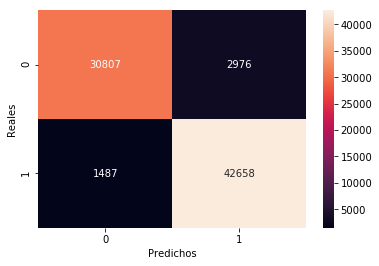

In [38]:
# En Train
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [39]:
# En Test
cm = confusion_matrix(y_test, y_pred)
cm

array([[10069,  1173],
       [  647, 14087]], dtype=int64)

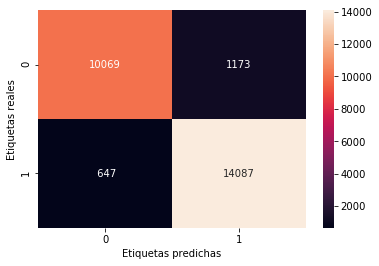

In [40]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True, fmt='4d')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

#### 3.1.4. Métricas

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
# Specificity
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
specificity = TN / (TN + FP)
print("Especificidad: ", specificity)


Accuracy score:  0.9299353249153064
Precision score:  0.923132372214941
Recall score:  0.9560879598208226
F1 score:  0.9393211975728478
Especificidad:  0.8956591353851627


### 3.2. Modelo versión 2

#### Acá probemos haciendo todo de nuevo pero sacando algunas de las features de caru

# 4. Logistic Regression

### 4.1. Modelo general

In [42]:
# Preparamos la matriz de features y el vector objetivo igual que para KNN
X = dftrain.drop(columns=["id","satisfaction", "satis_satisfied", "satis_neutral or dissatisfied", "Gender", "Customer Type", "Type of Travel", "Class", "duracion"])
y = dftrain["satis_neutral or dissatisfied"]

In [43]:
#Separamos un set de testeo para evaluar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77928, 23)
(25976, 23)
(77928,)
(25976,)


In [45]:
X.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'gender_Male', 'cliente_disloyal Customer', 'viaje_Personal Travel',
       'boleto_Eco', 'boleto_Eco Plus'],
      dtype='object')

In [47]:
# Verificamos que coincidan las proporciones del target 
y_train.mean(), y_test.mean()

(0.5664844471820142, 0.567215891592239)

In [48]:
# Estandarizamos los datos para que la regularización sea correcta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [49]:
# Importamos la clase
from sklearn.linear_model import LogisticRegression
# Instanciamos un objeto de esa clase
lr = LogisticRegression()
# Ajustamos esta instancia con los datos de entrenamiento
lr.fit(X_train_std, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
y_pred = lr.predict(X_test_std)

In [52]:
accuracy_score(y_train, lr.predict(X_train_std))

0.8749486705677035

In [53]:
accuracy_score(y_test, y_pred)

0.8760009239297813

#### 4.1.2. Matriz de Confusión

In [54]:
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.34429897, 0.97465405, 0.041382  , ..., 0.26257528, 0.05735763,
       0.56374404])

Text(33,0.5,'Reales')

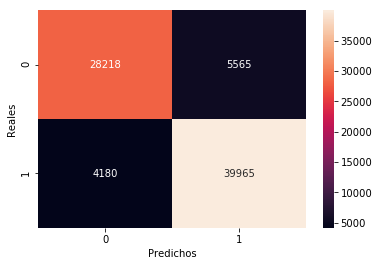

In [55]:
#en train
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [56]:
# En Test
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9479,  1763],
       [ 1458, 13276]], dtype=int64)

#### 4.1.3. Métricas

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_test, y_pred)))
print('Recall score: ', format(recall_score(y_test, y_pred)))
print('F1 score: ', format(f1_score(y_test, y_pred)))
# Specificity
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
specificity = TN / (TN + FP)
print("Especificidad: ", specificity)


Accuracy score:  0.8760009239297813
Precision score:  0.8827714608684089
Recall score:  0.9010452015745893
F1 score:  0.8918147314681087
Especificidad:  0.8431773705746308


### Curva ROC y área bajo la misma

In [58]:
from sklearn.metrics import roc_curve, auc

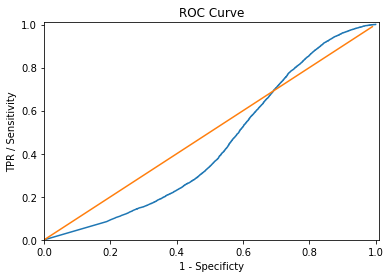

In [59]:
probs = lr.predict_proba(X_test)

fpr,tpr,_ = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

#### 4.1.4. Optimización del umbral (ojo que pisa los conjuntos de train y test para las métricas)

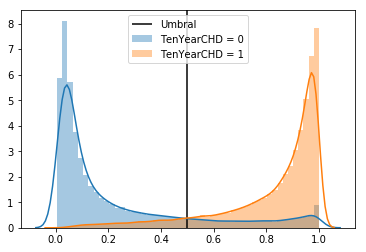

In [60]:
# Histograma de probabilidades
sns.distplot(lr.predict_proba(X_train_std[y_train==0])[:,1])
sns.distplot(lr.predict_proba(X_train_std[y_train==1])[:,1])
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'TenYearCHD = 0', 'TenYearCHD = 1'])

# 5. Naive Bayes

Importamos las librerias para trabajar

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 5.1. Features Target

In [50]:
# Separamos el dataset en la matriz de features X y el vector target Y
X = dftrain.drop(columns=["id","satisfaction", "satis_satisfied", "satis_neutral or dissatisfied", "Gender", "Customer Type", "Type of Travel", "Class",'duracion'])

Y = dftrain["satis_neutral or dissatisfied"]

# Armamos el conjunto de train y test para nuestro clasificador, con una proporción 70-30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(72732, 23)
(31172, 23)
(72732,)
(31172,)


### 5.2. Instanciamos y entrenamos un modelo naive bayes gaussiano.

In [52]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

GaussianNB()

### 5.3. Predict

In [53]:
Y_pred = gnb.predict(X_test)

Y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=uint8)

### 5.4. Performance del modelo

In [54]:
# Accuracy
accuracy_score(Y_test, Y_pred)

0.8594251251122802

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, Y_pred)))
print('Precision score: ', format(precision_score(Y_test, Y_pred)))
print('Recall score: ', format(recall_score(Y_test, Y_pred)))
print('F1 score: ', format(f1_score(Y_test, Y_pred)))



Accuracy score:  0.8594251251122802
Precision score:  0.8616259362528019
Recall score:  0.8948952359320879
F1 score:  0.8779455183555235


In [57]:
Y_train.shape

(72732,)

Confusion matrix

 [[11030  2531]
 [ 1851 15760]]


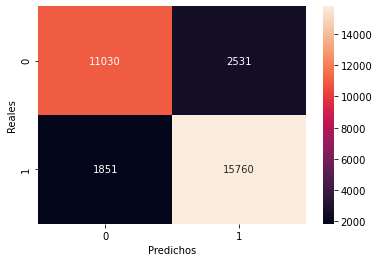

In [58]:
# Matriz de confusion

cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', cm)
sns.heatmap(cm, annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales');

In [59]:
# Specificity
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
specificity = TN / (TN + FP)
print("Especificidad: ", specificity)

Especificidad:  0.8133618464714991


In [56]:
#Accuracy train
accuracy_score(X_train, Y_train)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [78]:
X_train.shape

(72732, 23)

In [80]:
type(Y_train)

pandas.core.series.Series

In [73]:
# Comparamos la performance del modelo con lo que obtenemos si siempre elegimos la clase mayoritaria como predicción

Y_train.value_counts()

1    41268
0    31464
Name: satis_neutral or dissatisfied, dtype: int64

## 6. Optimización utilizando GridSearchCV

Importamos las librerias a utilizar para GridSearchCV

In [ ]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

### 6.1. Preparamos nuevamente la matriz de features y el vector target.

In [ ]:
dftrain.columns

##### Creamos un df de juguete para ver si la busqueda de hiperparametros funciona bien.

In [ ]:
df_muestra= dftrain.sample(1000)

In [ ]:
df_muestra=df_muestra.dropna()

In [ ]:
cols=['Age','Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
      'gender_Female', 'gender_Male', 'cliente_Loyal Customer',
       'cliente_disloyal Customer', 'viaje_Business travel',
       'viaje_Personal Travel', 'boleto_Business', 'boleto_Eco',
       'boleto_Eco Plus']

In [ ]:
X=df_muestra[cols]
y= df_muestra["satis_neutral or dissatisfied"]

In [ ]:
# Separamos en train y test
X_train,X_test,ytrain,ytest = train_test_split(X, y , stratify=y, random_state= 0)

In [ ]:
#Escalamos ya que utilizamos dos estimadores que necesitan escalar las features.
scaler= StandardScaler()

In [ ]:
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)

In [ ]:
models = [LogisticRegression(),
          KNeighborsClassifier()]

### 6.2. Comenzamos la búsqueda de hiperparámetros.
En este caso, en relación a nuestro estimador KNN vamos a tener en cuenta los siguientes hiper parámetros:
* C
* Penalty
* Solver

Por otro lado, para el caso de nuestro modelo de regresión logística tenemos en cuenta:
* n_neighbors
* weights
* P

In [ ]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]}
]

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [ ]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train_std, ytrain)
    grids.append(fit)

In [ ]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

##### Separamos los dos mejores modelos.

In [ ]:
grids[0]

In [ ]:
grids[1]

#### Ahora vemos como nos va a la hora de predecir. 

In [ ]:
y_pred_log= grids[0].predict(X_test_std)
y_pred_knn= grids[1].predict(X_test_std)

#### Evaluamos la performance del mismo. 

##### Primero evaluamos la performance de la Regresión Logística

In [ ]:
print(classification_report(ytest,y_pred_log))

In [ ]:
sns.heatmap(confusion_matrix(ytest,y_pred_log),annot=True, fmt="4d");

##### Ahora evaluamos la performance del modelo KNN.

In [ ]:
print(classification_report(ytest,y_pred_knn))

In [ ]:
sns.heatmap(confusion_matrix(ytest,y_pred_knn), annot=True, fmt="4d");

# 7. Conclusion final

In [12]:
df_con = pd.read_excel('Dh_desafio_3_21_32.xlsx')

,N,Modelo,Features,Accuracy Train,Accuracy Test,Precision,Recall,Specificity,F1_Score
0,1,KNN Escalado (n=8),A,0.943271,0.929935,0.923132,0.956088,0.895659,0.939321
1,2,KNN Escalado (n=8),A-Age,-,0.929396,-,-,-,-
2,3,KNN Escalado (n=8),A-Wifi,-,0.911880,-,-,-,-
3,4,KNN Escalado (n=8),A-Inflight entertainment,-,0.931475,-,-,-,-
4,5,KNN Escalado (n=8),A-Type of travel,-,0.929935,-,-,-,-
5,6,KNN Escalado (n=8),A-Arrival delay in minutes,-,0.930513,-,-,-,-
6,7,KNN Escalado (n=8),A-Departure delay in minutes,-,0.929974,-,-,-,-
7,8,KNN Escalado (n=8),A-Flight Distance,-,0.932245,-,-,-,-
8,9,KNN Escalado (n=8),A-Online boarding,-,0.927164,-,-,-,-
9,10,KNN Escalado (n=8),A-Boleto económico,-,0.929165,-,-,-,-


**7.1. Análisis comparativo**

En esta sección haremos una comparación respecto de las principales métricas que han arrojado los modelos que hemos especificado.

¿Cuáles son los modelos que corrimos?

**KNN**
+ 1.	Modelo Escalado con 8 vecinos (k óptimo) y todas las features
+ 2.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Age
+ 3.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Inflight Wifi Service
+ 4.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Inflight entertainment
+ 5.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Type of Travel
+ 6.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Arrival delay in minutes
+ 7.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Departure delay in minutes
+ 8.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Flight Distance
+ 9.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Online Boarding
+ 10.	Modelo escalado con 8 vecinos (k óptimo) y sacando la variable Boleto económico

**REGRESIÓN LOGÍSTICA**
+ 11.	Modelo Escalado con todas las features
+ 12.	Modelo escalado con sacando la variable age
+ 13.	Modelo escalado con sacando la variable wifi
+ 14.	Modelo escalado con sacando la variable Inflight entertainment
+ 15.	Modelo escalado con sacando la variable Arrival delay in minutes
+ 16.	Modelo escalado con sacando la variable Departure delay in minutes
+ 17.	Modelo escalado con sacando la variable Type of travel
+ 18.	Modelo escalado con sacando la variable Flight distance
+ 19.	Modelo escalado con sacando la variable Online boarding
+ 20.	Modelo escalado con sacando la variable Boleto económico

**NAIVE BAYES**
+ 21.	Modelo Escalado con todas las features

**OPTIMIZACION CON GRIDSEARCH**
Teniendo en cuenta los tiempos que tuvimos para realizar el desafío, y considerando además la gran cantidad de datos con las que estamos trabajando (>100k) nos fue imposible aplicar esta herramienta en la práctica.
Lo dejamos sentado en la notebook de clase en el apartado 6 con la intención de mostrar que comprendimos cómo funciona este artilugio. Lo realizamos para una muestra de 10k datos.

**7.2. Resultados**

In [13]:
df_con

,N,Modelo,Features,Accuracy Train,Accuracy Test,Precision,Recall,Specificity,F1_Score
0,1,KNN Escalado (n=8),A,0.943271,0.929935,0.923132,0.956088,0.895659,0.939321
1,2,KNN Escalado (n=8),A-Age,-,0.929396,-,-,-,-
2,3,KNN Escalado (n=8),A-Wifi,-,0.911880,-,-,-,-
3,4,KNN Escalado (n=8),A-Inflight entertainment,-,0.931475,-,-,-,-
4,5,KNN Escalado (n=8),A-Type of travel,-,0.929935,-,-,-,-
5,6,KNN Escalado (n=8),A-Arrival delay in minutes,-,0.930513,-,-,-,-
6,7,KNN Escalado (n=8),A-Departure delay in minutes,-,0.929974,-,-,-,-
7,8,KNN Escalado (n=8),A-Flight Distance,-,0.932245,-,-,-,-
8,9,KNN Escalado (n=8),A-Online boarding,-,0.927164,-,-,-,-
9,10,KNN Escalado (n=8),A-Boleto económico,-,0.929165,-,-,-,-


**Referencia columna Features**: El valor A hace referencia a la utilizacion de las features en el modelo

**7.3. Modelo Ganador**

El modelo que mejor performance ha logrado a nivel agregado, considerando no sólo los valores de accuracy tanto en train como en test sino además las métricas que provienen de observar la matriz de confusión (recall, precisión, especificidad, etc.) ha sido el número 1.

En este modelo hemos instanciado un modelo clasificador KNN que incluye todas las features y tiene un número de 8 vecinos (valor que surge de la optimización de dicho hiperparámetro).


In [17]:
winner_model = df_con.loc[0]
winner_model

N                                  1
Modelo            KNN Escalado (n=8)
Features                           A
Accuracy Train              0.943271
Accuracy Test               0.929935
Precision                   0.923132
Recall                      0.956088
Specificity                 0.895659
F1_Score                    0.939321
Name: 0, dtype: object

# 8. Recomendacion de mejoras de negocio

En vistas a mejorar el servicio prestado por la aerolínea decidimos proponer ampliar el paquete de beneficios brindados a aquel sector que detectamos como clientes insatisfechos, dentro de los cuales encontramos como espacios de mejora:

+ Viajan en la clase Económica. 
+ Tienen entre 30 y 50 años 
+ Cuyo vuelo demore más de una hora
+ El vuelo en cuestión es "Media Distancia" (entre 420km y 1200km)
+ Online boarding
+ Wifi
+ Enterteiment
+ Type of travel

Dentro de este paquete vamos a ofrecer servicios mejorados en cuanto:

+ Mayores prestaciones a las personas que viajan en clase económica: Desde descuentos, acumulacion de millas, menu gourmet mas abarcativo, salas VIP para el disfrute en el pre embarque.
+ Para el rango etario 30-50 proponemos ofrecer comodidades ergonomicas, incluyan almohadillas para viaje (de tipo descartable ) y aumentar la oferta de peliculas, juegos, espectaculos televisados y musica, generando acuerdos con proveedores de entretenimiento.
+ Aumentar la frecuencia de viaje, generando join-ventures con socios locales, para aumentar los tiempos de frecuencia.
+ Reducir la tarifa de Wi-fi, aumentando velocidad de navegacion y mejorando la conectividad.
+ Mejorar a nivel funcional el sistema de reservas online.